In [2]:
# import libraries

import kaleido
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio


# pio.renderers.default = "svg"

In [3]:
# import data

df_delay = pd.read_excel("get_around_delay_analysis.xlsx")
df_delay

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN,573429.0,300.0
21306,573790,341965,mobile,ended,-337.0,NaN,NaN
21307,573791,364890,mobile,ended,144.0,NaN,NaN
21308,574852,362531,connect,ended,-76.0,NaN,NaN


In [4]:
df_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


In [5]:
df_delay.describe(include="all")

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


In [6]:
df_delay['checkin_type'].value_counts()

mobile     17003
connect     4307
Name: checkin_type, dtype: int64

<AxesSubplot: xlabel='checkin_type', ylabel='count'>

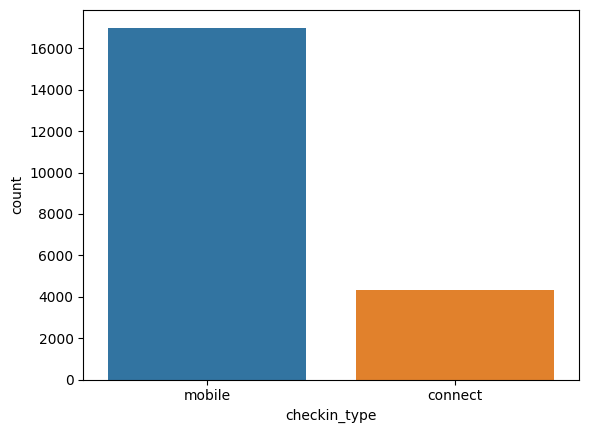

In [7]:
sns.countplot(x=df_delay['checkin_type'])

ended       18045
canceled     3265
Name: state, dtype: int64


<AxesSubplot: xlabel='state', ylabel='count'>

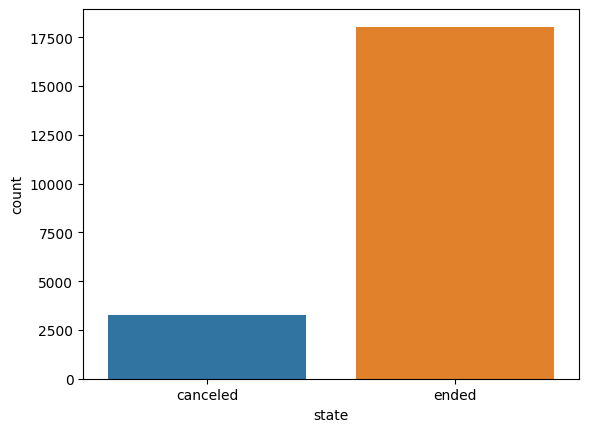

In [8]:
print(df_delay['state'].value_counts())
sns.countplot(data=df_delay, x='state')

ended       18045
canceled     3265
Name: state, dtype: int64


<AxesSubplot: xlabel='state', ylabel='count'>

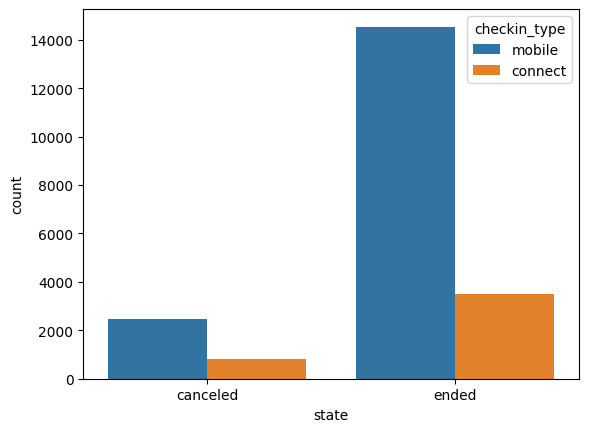

In [9]:
print(df_delay['state'].value_counts())
sns.countplot(data=df_delay, x='state', hue='checkin_type')

# create a feature delay :  delay_at_checkout_in_minutes >= 0

In [10]:
df_delay['delay'] = df_delay["delay_at_checkout_in_minutes"].apply(lambda x : "yes" if x >= 0 else "no")

In [24]:
sum(df_delay['delay']=="no")/len(df_delay['delay'])

0.5529798216799625

In [23]:
sum(df_delay['delay']=="yes")

9526

no     11784
yes     9526
Name: delay, dtype: int64
% no delay 0.5529798216799625
% yes delay 0.44702017832003754



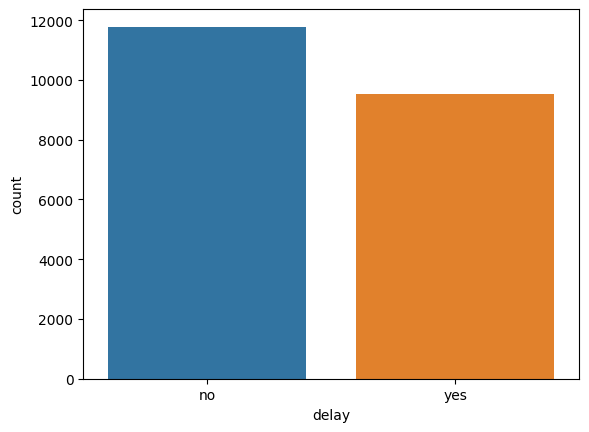

In [26]:
print(df_delay['delay'].value_counts())
print("% no delay", sum(df_delay['delay']=="no")/len(df_delay['delay']))
print("% yes delay",sum(df_delay['delay']=="yes")/len(df_delay['delay']))
sns.countplot(data=df_delay, x='delay')
print()

In [12]:
display(df_delay.groupby('delay')['checkin_type'].value_counts())

delay  checkin_type
no     mobile          8961
       connect         2823
yes    mobile          8042
       connect         1484
Name: checkin_type, dtype: int64

<AxesSubplot: xlabel='checkin_type', ylabel='count'>

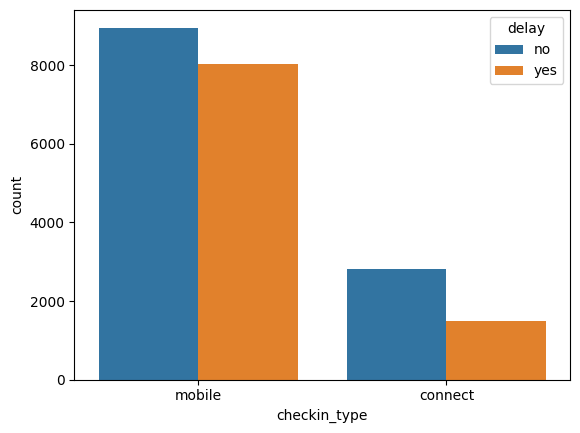

In [13]:
sns.countplot(data=df_delay, x='checkin_type', hue='delay')
# plt.text(df_delay["delay"],"y", "s", horizontalalignment='center')
# plt.show()

In [36]:
print(f'number of previous rental with delay lower than 12 hours : {sum(df_delay["previous_ended_rental_id"].notna())}')
round(100* sum(df_delay["previous_ended_rental_id"].notna())/len(df_delay), 2)

number of previous rental with delay lower than 12 hours : 1841


8.64

In [40]:
df_delay['delay_at_checkout_in_minutes'] = df_delay['delay_at_checkout_in_minutes'].apply(lambda x : x if x >0
else 0)

In [43]:
df_delay['delay_at_checkout_in_minutes'].head()

0     0.0
1     0.0
2    70.0
3     0.0
4     0.0
Name: delay_at_checkout_in_minutes, dtype: float64

In [48]:
df_only_with_delay = df_delay[df_delay['delay_at_checkout_in_minutes']>0]

In [50]:
len(df_only_with_delay)

9404

<AxesSubplot: xlabel='delay_at_checkout_in_minutes', ylabel='Count'>

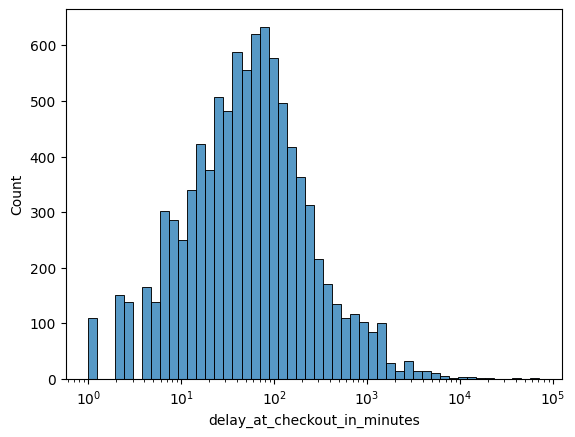

In [55]:
sns.histplot(data = df_only_with_delay, x = 'delay_at_checkout_in_minutes', bins= 50, log_scale=True)

In [39]:
df_delay["car_id"].value_counts()

334190    33
392479    29
241021    29
342699    27
300505    24
          ..
372160     1
297623     1
403246     1
267750     1
408598     1
Name: car_id, Length: 8143, dtype: int64

In [11]:
df_delay[df_delay["previous_ended_rental_id"].notna()]

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
6,511639,370585,connect,ended,-15.0,563782.0,570.0
19,519491,312389,mobile,ended,58.0,545639.0,420.0
23,521156,392479,mobile,ended,NaN,537298.0,0.0
34,525044,349751,mobile,ended,NaN,510607.0,60.0
40,528808,181625,connect,ended,-76.0,557404.0,330.0
...,...,...,...,...,...,...,...
21269,568049,381499,connect,canceled,NaN,562174.0,720.0
21272,568241,396409,mobile,canceled,NaN,566136.0,570.0
21275,568523,297973,mobile,ended,12.0,567121.0,240.0
21286,569717,377312,mobile,ended,230.0,545045.0,90.0


Join columns from df_delay and the delay_at_checkout_in_minutes of the previous rental

In [12]:
df_delay_new = df_delay.merge(df_delay[['rental_id','delay_at_checkout_in_minutes']], left_on='previous_ended_rental_id', right_on='rental_id', how='left')
df_delay_new

,rental_id_x,car_id,checkin_type,state,delay_at_checkout_in_minutes_x,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,rental_id_y,delay_at_checkout_in_minutes_y
0,505000,363965,mobile,canceled,NaN,NaN,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN,573429.0,300.0,573429.0,NaN
21306,573790,341965,mobile,ended,-337.0,NaN,NaN,NaN,NaN
21307,573791,364890,mobile,ended,144.0,NaN,NaN,NaN,NaN
21308,574852,362531,connect,ended,-76.0,NaN,NaN,NaN,NaN


In [13]:
df_delay_new[df_delay_new['delay_at_checkout_in_minutes_y'].notna()]

,rental_id_x,car_id,checkin_type,state,delay_at_checkout_in_minutes_x,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,rental_id_y,delay_at_checkout_in_minutes_y
6,511639,370585,connect,ended,-15.0,563782.0,570.0,563782.0,136.0
19,519491,312389,mobile,ended,58.0,545639.0,420.0,545639.0,140.0
34,525044,349751,mobile,ended,NaN,510607.0,60.0,510607.0,-113.0
40,528808,181625,connect,ended,-76.0,557404.0,330.0,557404.0,-352.0
64,533670,320824,connect,ended,-6.0,556563.0,630.0,556563.0,23.0
...,...,...,...,...,...,...,...,...,...
21266,567741,294059,mobile,ended,111.0,567708.0,120.0,567708.0,283.0
21269,568049,381499,connect,canceled,NaN,562174.0,720.0,562174.0,73.0
21272,568241,396409,mobile,canceled,NaN,566136.0,570.0,566136.0,16.0
21275,568523,297973,mobile,ended,12.0,567121.0,240.0,567121.0,-275.0


In [14]:
df_delay_new['delay_at_checkout_with_previous_rental'] = df_delay_new['delay_at_checkout_in_minutes_y'].apply(lambda x : x if x >0
else 0)

In [15]:
df_delay_new['delay_at_checkin_in_minutes'] = df_delay_new['delay_at_checkout_with_previous_rental'] - df_delay_new['time_delta_with_previous_rental_in_minutes']
df_delay_new['delay_at_checkin_in_minutes'] = df_delay_new['delay_at_checkin_in_minutes'].apply(lambda x : x if x >0
else 0)

In [16]:
df_delay_new['delay'] = df_delay_new['delay_at_checkin_in_minutes'].apply(lambda x : True if x >0
else False)

In [17]:
df_delay_new['delay'].value_counts()

False    21092
True       218
Name: delay, dtype: int64

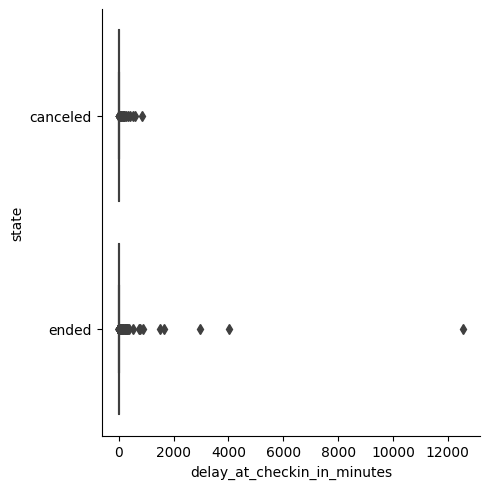

In [18]:
sns.catplot(data=df_delay_new, x="delay_at_checkin_in_minutes", y = 'state', kind="box")

<AxesSubplot: xlabel='delay', ylabel='count'>

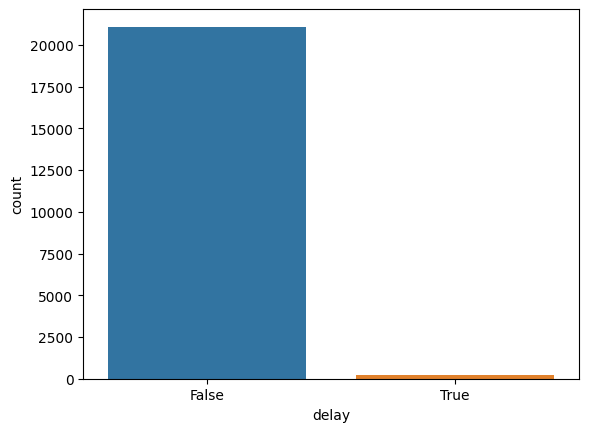

In [19]:
sns.countplot(data=df_delay_new, x="delay")


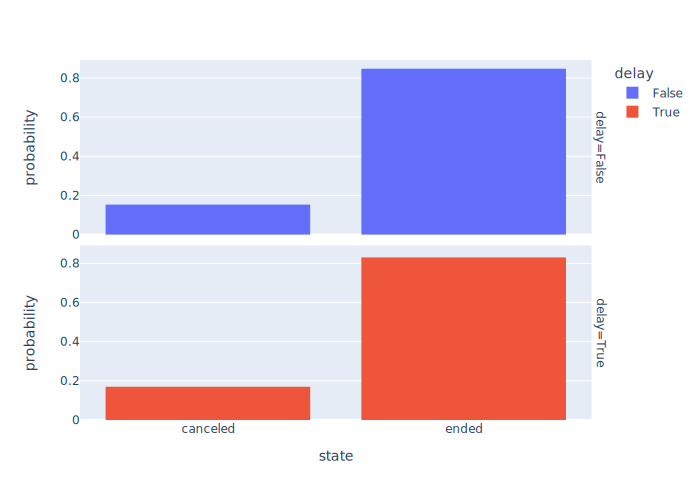

In [21]:
fig = px.histogram(df_delay_new, x = "state", color = 'delay', facet_row = 'delay', histnorm = 'probability')
fig.show()

In [ ]:
df_delay_new.to_csv("delay_new.csv")